In [ ]:
import pyarrow
import pandas as pd
import numpy as np
import os

# use paraquet to load the data as-is
# Define the target directory path
parquet_dir = "../data/processed/"

# Create the directory if it doesn't exist
os.makedirs(parquet_dir, exist_ok=True)  # `exist_ok=True` prevents errors if dir already exists


Load Metadata

In [21]:
metadata_df = pd.read_parquet(os.path.join(parquet_dir, "metadata.parquet"))

In [5]:
metadata_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   message_id        1866 non-null   int64              
 1   channel_name      1866 non-null   object             
 2   channel_username  1866 non-null   object             
 3   timestamp         1866 non-null   datetime64[ns, UTC]
 4   has_media         1866 non-null   bool               
 5   media_type        1866 non-null   object             
 6   message_length    1866 non-null   int64              
 7   word_count        1866 non-null   int64              
 8   amharic_ratio     1866 non-null   float64            
 9   hour_of_day       1866 non-null   int32              
 10  day_of_week       1866 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int32(1), int64(3), object(4)
memory usage: 140.4+ KB


Load NER DATA

In [22]:
ner_df = pd.read_csv("../data/processed/ner_extracted.csv")

In [13]:
ner_df

,product_name,price,currency,location,contact_info,is_available,message_id,product_category
0,BARDEFU 2 IN 1 Multi purpose juicer ኳሊቲ የሆነ የጁ...,6800.0,ETB,ቁ1 መገናኛ ታሜ ጋስ ህንፃ ጎን ስሪ ኤም ሲቲ ሞል ሁለተኛ ፎቅ ቢሮ ቁ ...,2.519095e+11,True,7403,Electronics
1,portable electrical water dispenser ባለ 3 press...,1600.0,ETB,ቁ1 መገናኛ ታሜ ጋስ ህንፃ ጎን ስሪ ኤም ሲቲ ሞል ሁለተኛ ፎቅ ቢሮ ቁ ...,2.519095e+11,True,7401,Electronics
2,GROOMING SET ሶስት በአንድ የያዘ የፀጉር ማሽን እና ሼቨር የሚሰራ...,2300.0,ETB,ቁ1 መገናኛ ታሜ ጋስ ህንፃ ጎን ስሪ ኤም ሲቲ ሞል ሁለተኛ ፎቅ ቢሮ ቁ ...,2.519095e+11,True,7399,Home Goods
3,GROOMING SET ሶስት በአንድ የያዘ የፀጉር ማሽን እና ሼቨር የሚሰራ...,2300.0,ETB,ቁ1 መገናኛ ታሜ ጋስ ህንፃ ጎን ስሪ ኤም ሲቲ ሞል ሁለተኛ ፎቅ ቢሮ ቁ ...,2.519095e+11,True,7395,Home Goods
4,1L Water Bottle High Quality 1L water time sca...,800.0,ETB,ቁ1 መገናኛ ታሜ ጋስ ህንፃ ጎን ስሪ ኤም ሲቲ ሞል ሁለተኛ ፎቅ ቢሮ ቁ ...,2.519095e+11,True,7393,Home Goods
...,...,...,...,...,...,...,...,...
1861,JORDAN 9 size 44142434445 MADE IN VIETNAM SHEW...,NaN,ETB,ድሬዳዋ አሸዋ ሚና 1 ፎቅ እንገኛለን ስልክ 0987336458 0924209...,2.519873e+11,False,2640,Clothing
1862,Reebok hunter Green size 40414243 MADE IN VIET...,NaN,ETB,ድሬዳዋ አሸዋ ሚና 1 ፎቅ እንገኛለን ስልክ 0987336458 0924209...,2.519873e+11,False,2639,Clothing
1863,NIKE Alpha Huarache Elite 3 size 40414243 MADE...,NaN,ETB,ድሬዳዋ አሸዋ ሚና 1 ፎቅ እንገኛለን ስልክ 0987336458 0924209...,2.519873e+11,False,2638,Clothing
1864,Alexander McQUEEN size 36373839 SHEWA BRAND አድ...,NaN,ETB,ድሬዳዋ አሸዋ ሚና 1 ፎቅ እንገኛለን ስልክ 0987336458 0924209...,2.519873e+11,False,2637,Other


In [24]:
def create_full_dataset(metadata_df: pd.DataFrame, message_df: pd.DataFrame) -> pd.DataFrame:
    """
    Merge metadata with NER extracted information
    """
    # Merge with metadata
    full_df = pd.merge(
        metadata_df,
        message_df,
        left_on='message_id',
        right_on='message_id',
        how='left'
    )
    
    # Clean price data
    full_df['price'] = pd.to_numeric(full_df['price'], errors='coerce')
    
    return full_df

# Example usage
full_dataset = create_full_dataset(metadata_df, ner_df)

In [16]:
full_dataset.columns

Index(['message_id', 'channel_name', 'channel_username', 'timestamp',
       'has_media', 'media_type', 'message_length', 'word_count',
       'amharic_ratio', 'hour_of_day', 'day_of_week', 'product_name', 'price',
       'currency', 'location', 'contact_info', 'is_available',
       'product_category'],
      dtype='object')

In [25]:
full_dataset.isna().sum()

message_id            0
channel_name          0
channel_username      0
timestamp             0
has_media             0
media_type            0
message_length        0
word_count            0
amharic_ratio         0
hour_of_day           0
day_of_week           0
product_name          0
price               605
currency              0
location            201
contact_info         16
is_available          0
product_category      0
dtype: int64

Handle Missing Values

In [31]:
# Fill missing values in 'price' column
# Use median price for product category
category_median = full_dataset.groupby('product_category')['price'].transform('median')
full_dataset['price'] = full_dataset['price'].fillna(category_median)

# Fill missing values in 'location' column
# Calculate the mode for each group (returns a Series with the first mode if multiple exist)
location_mode = (
    full_dataset.groupby('channel_username')['location']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)

# Fill missing 'location' values using the mapped mode
full_dataset['location'] = full_dataset['location'].fillna(
    full_dataset['channel_username'].map(location_mode)
)

# Fill missing values in 'contact_info' column
contact_info_mode = full_dataset.groupby("channel_username")['contact_info'].transform('median')
full_dataset['contact_info'] = full_dataset['contact_info'].fillna(contact_info_mode)


In [32]:
full_dataset.isna().sum()

message_id          0
channel_name        0
channel_username    0
timestamp           0
has_media           0
media_type          0
message_length      0
word_count          0
amharic_ratio       0
hour_of_day         0
day_of_week         0
product_name        0
price               0
currency            0
location            0
contact_info        0
is_available        0
product_category    0
dtype: int64

In [39]:
full_dataset['price'].describe()

count     1866.000000
mean      3225.165059
std       1216.950135
min          4.000000
25%       3100.000000
50%       3300.000000
75%       3400.000000
max      26000.000000
Name: price, dtype: float64

In [46]:
from datetime import datetime, timedelta

def calculate_vendor_metrics(merged_df):
    """
    Processes the full dataset to calculate lending metrics per vendor
    Returns a DataFrame with vendor scorecards
    """
    # Convert timestamp
    merged_df['date'] = pd.to_datetime(merged_df['timestamp']).dt.date
    
    # Group by vendor
    vendor_groups = merged_df.groupby('channel_username')
    
    scorecards = []
    
    for vendor, group in vendor_groups:
        # Activity Metrics
        date_range = (group['date'].max() - group['date'].min()).days
        posts_per_week = len(group) / (date_range / 7) if date_range > 0 else 0
        
        # Engagement Metrics (assuming 'views' column exists)
        avg_views = group['views'].mean() if 'views' in group.columns else np.nan
        top_post = group.loc[group['views'].idxmax()] if 'views' in group.columns else None
        
        # Business Profile
        avg_price = group['price'].mean()
        price_category = 'High-margin' if avg_price > 3300 else 'Volume' 
        
        # Calculate Lending Score (customize weights as needed)
        lending_score = (
            0.4 * (avg_views / 3300 if not np.isnan(avg_views) else 0.5) + 
            0.3 * min(posts_per_week / 5, 1) + 
            0.2 * (1 if price_category == 'High-margin' else 0.7) + 
            0.1 * (group['has_media'].mean())
        ) * 100
        
        scorecards.append({
            'Vendor ID': vendor,
            'Vendor Name': group['channel_name'].iloc[0],
            'Avg. Views/Post': round(avg_views) if not np.isnan(avg_views) else 'N/A',
            'Posts/Week': round(posts_per_week, 1),
            'Avg. Price (ETB)': round(avg_price),
            'Price Strategy': price_category,
            'Top Product': top_post['product_name'] if top_post is not None else 'N/A',
            'Top Product Price': top_post['price'] if top_post is not None else 'N/A',
            'Media Ratio': f"{group['has_media'].mean():.0%}",
            'Lending Score': round(lending_score)
        })
    
    return pd.DataFrame(scorecards)


In [ ]:
# Generate Scorecard Report
def generate_scorecard_report(scorecard_df):
    """Formats the final report with key sections"""
    report = f"""
    ETHIOMART VENDOR SCORECARD
    Generated on: {datetime.now().strftime('%Y-%m-%d')}
    Total Vendors Analyzed: {len(scorecard_df)}
    
    ========================
    KEY METRICS SUMMARY:
    {scorecard_df[['Vendor Name', 'Posts/Week', 'Avg. Price (ETB)', 'Lending Score']]
     .sort_values('Lending Score', ascending=False)
     .head(10)
     .to_string(index=False)}
    
    ========================
    TOP PERFORMERS BY CATEGORY:
    • Highest Engagement: {scorecard_df.loc[scorecard_df['Avg. Views/Post'].idxmax()]['Vendor Name']}
    • Most Active: {scorecard_df.loc[scorecard_df['Posts/Week'].idxmax()]['Vendor Name']}
    • Premium Sellers: {scorecard_df.loc[scorecard_df['Avg. Price (ETB)'].idxmax()]['Vendor Name']}
    
    ========================
    LENDING RECOMMENDATIONS:
    """
    
    # Add lending recommendations
    for _, row in scorecard_df[scorecard_df['Lending Score'] >= 70].iterrows():
        report += f"\n• APPROVE {row['Vendor Name']} ({row['Lending Score']}): ${min(round(row['Avg. Price (ETB)'] * 10), 50000)} ETB micro-loan"
    
    return report


In [53]:
scorecard = calculate_vendor_metrics(full_dataset)


In [56]:
scorecard

,Vendor ID,Vendor Name,Avg. Views/Post,Posts/Week,Avg. Price (ETB),Price Strategy,Top Product,Top Product Price,Media Ratio,Lending Score
0,@Shewabrand,Shewa Brand,N/A,5.5,3217,Volume,N/A,N/A,100%,74
1,@ethio_brand_collection,EthioBrand®,N/A,10.5,3390,High-margin,N/A,N/A,100%,80
2,@shageronlinestore,Sheger online-store,N/A,14.6,2654,Volume,N/A,N/A,100%,74


In [57]:
scorecard_report = generate_scorecard_report(scorecard)

In [58]:
from IPython.display import Markdown, display

display(Markdown(f"```\n{scorecard_report}\n```"))

```

    ETHIOMART VENDOR SCORECARD
    Generated on: 2025-06-24
    Total Vendors Analyzed: 3

    ========================
    KEY METRICS SUMMARY:
            Vendor Name  Posts/Week  Avg. Price (ETB)  Lending Score
        EthioBrand®        10.5              3390             80
        Shewa Brand         5.5              3217             74
Sheger online-store        14.6              2654             74

    ========================
    TOP PERFORMERS BY CATEGORY:
    • Highest Engagement: Shewa Brand
    • Most Active: Sheger online-store
    • Premium Sellers: EthioBrand®

    ========================
    LENDING RECOMMENDATIONS:
    
• APPROVE Shewa Brand (74): $32170 ETB micro-loan
• APPROVE EthioBrand® (80): $33900 ETB micro-loan
• APPROVE Sheger online-store (74): $26540 ETB micro-loan
```

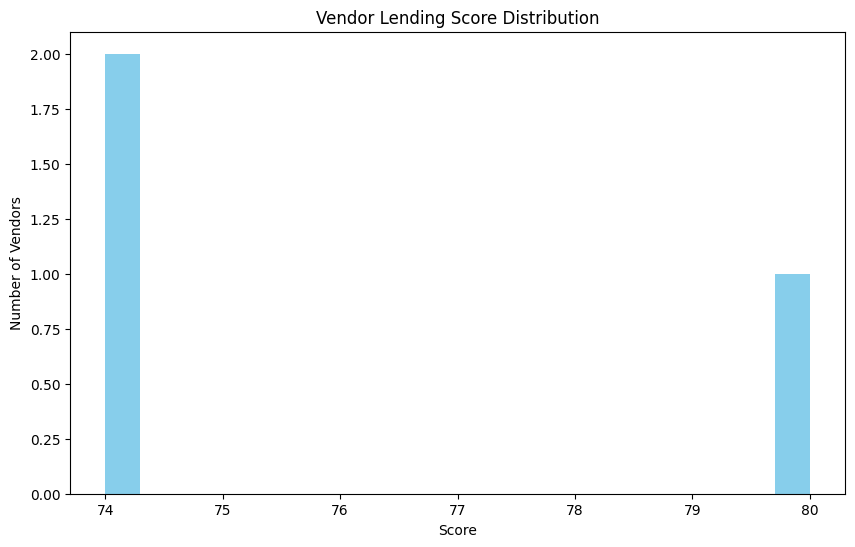

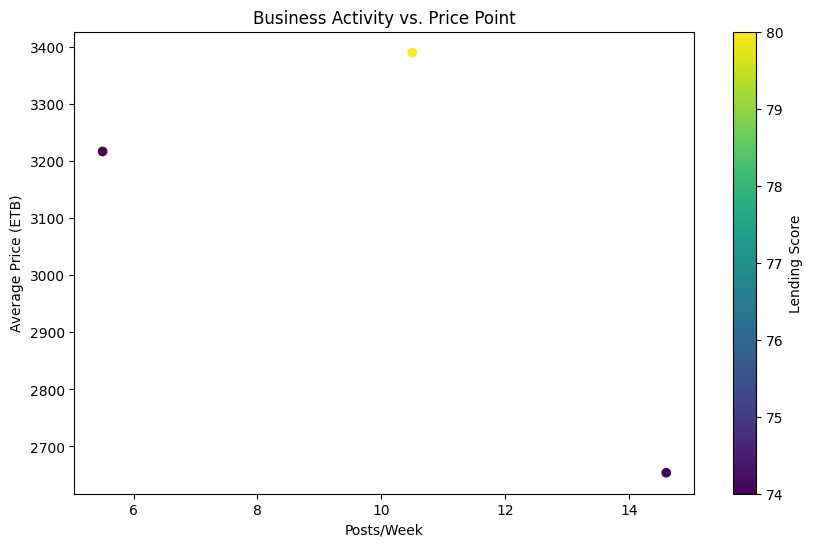

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def create_visualizations(df):    
    # Score Distribution
    plt.figure(figsize=(10,6))
    plt.hist(df['Lending Score'], bins=20, color='skyblue')
    plt.title("Vendor Lending Score Distribution")
    plt.xlabel("Score")
    plt.ylabel("Number of Vendors")
    plt.show()
    
    # Price vs. Activity
    plt.figure(figsize=(10,6))
    plt.scatter(df['Posts/Week'], df['Avg. Price (ETB)'], c=df['Lending Score'], cmap='viridis')
    plt.colorbar(label='Lending Score')
    plt.title("Business Activity vs. Price Point")
    plt.xlabel("Posts/Week")
    plt.ylabel("Average Price (ETB)")
    plt.show()

create_visualizations(scorecard)